This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order to predict the outcome of the drugs type that might be suitable for the patient.

-->This notebook aims to:

Dataset exploration using various types of data visualization.
Build various ML models that can predict drug type.

-->The machine learning models used in this project are:

Linear Logistic Regression
Linear Support Vector Machine (SVM)
K Neighbours
Naive Bayes (Categorical & Gaussian)
Decision Tree
Random Forest

# IMPORTING LIBRARIES


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=(10,5)

# READING DATA SET


In [ ]:
df = pd.read_csv('drug.csv')

In [3]:
df.sample()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
4,61,F,LOW,HIGH,18.043,DrugY


There are 6 variables in this data set:

4 categorical variables,and
2 continuous variables.

# INITIAL DATASET EXPLORATION

In [4]:
#CHCEK DATA TYPE AND NULL VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


NO NULL VALUES

In [5]:
#CHECK STATISTICAL VALUES AND SKEWNESS FOR NUMERICAL VARIABLE
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [15]:
sa=df['Age'].skew(axis=0,skipna=True)
print('skewness for Age:',sa)

skewness for Age: 0.03030835703000607


In [16]:
sn = df['Na_to_K'].skew(axis=0,skipna=True)
print('skewness for Na_to_K:',sn)

skewness for Na_to_K: 1.039341186028881


C:\Users\Shikha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


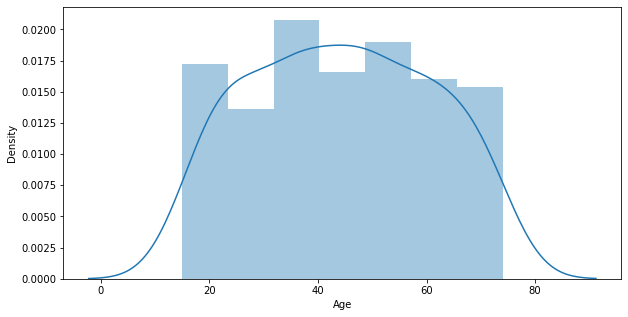

In [18]:
sns.distplot(df['Age'])
plt.show()

C:\Users\Shikha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


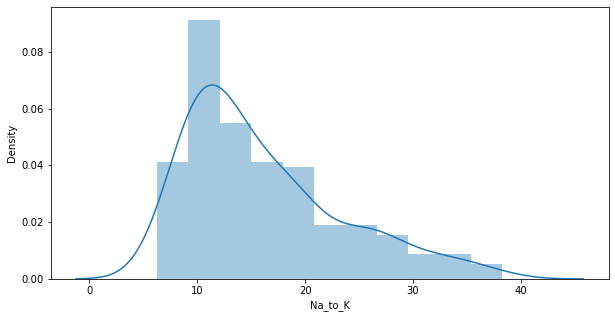

In [19]:
sns.distplot(df['Na_to_K'])
plt.show()

-->The distribution of Age almost symmetrical as the skewness value lies between -0.5 and 0.5
-->The distribution of Na_to_K is moderately right skewed as the skewness value likes between 0.5 and 1 

#CATEGORICAL VARIABLE

In [7]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

THE DISTRIBUTION OF GENDER IS BALANCED

In [8]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

THE DISTRIBUTION OF BLOOD PRESSURE LEVEL IS BALANCED

In [9]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

THE DISTRIBUTION OF CHOLESTEROL LEVEL IS BALANCED

In [10]:
df['Drug'].value_counts() #TARGET VARIABLE

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

THE DISTRIBUTION OF TARGET VARIABLE SHOWS THAT DrugY IS USED MORE THAN OTHERS

# EDA
This section will explore variables in the dataset using different various plots/charts.

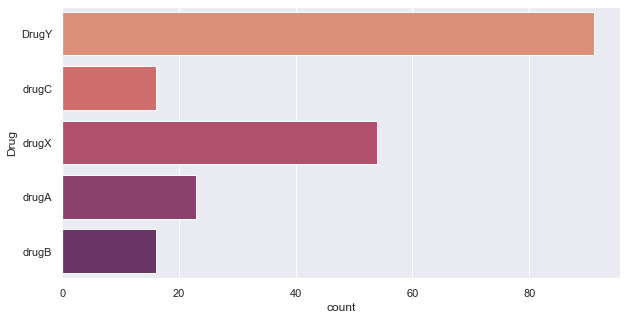

In [21]:
sns.set_theme(style = 'darkgrid')
sns.countplot(y = 'Drug',data = df, palette = 'flare')
plt.show()

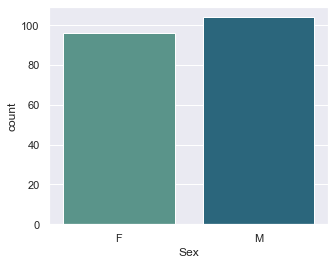

In [43]:
plt.figure(figsize=(5,4))
sns.set_theme(style='darkgrid')
sns.countplot(x='Sex',data = df,palette='crest')
plt.show()

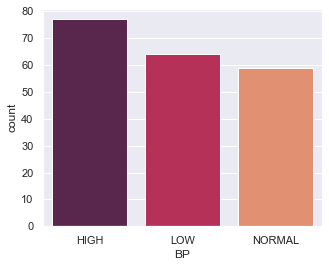

In [42]:
plt.figure(figsize=(5,4))
sns.set_theme(style='darkgrid')
sns.countplot(x='BP',data = df,palette='rocket')
plt.show()

In [25]:
df.sample()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
156,31,M,HIGH,NORMAL,11.227,drugA


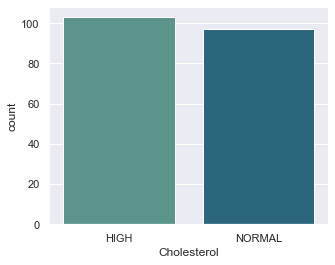

In [53]:
plt.figure(figsize=(5,4))
sns.set_theme(style='darkgrid')
sns.countplot(x='Cholesterol',data = df,palette='crest')
plt.show()

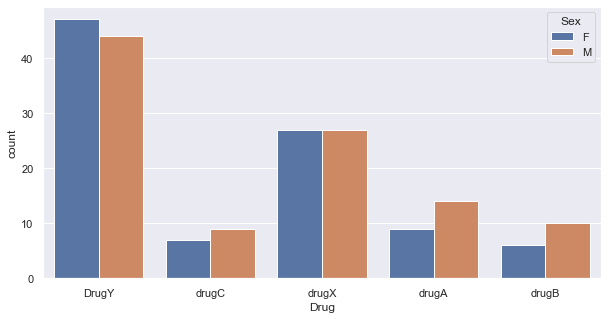

In [49]:
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'Drug',data = df,hue = 'Sex' )
plt.show()

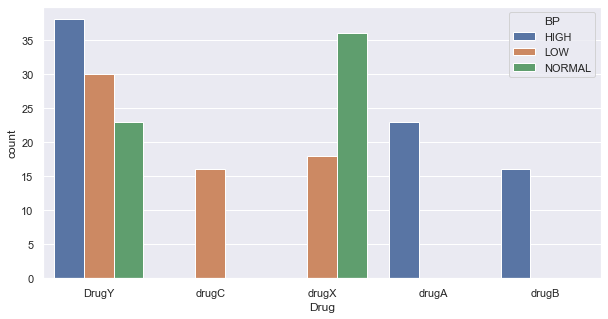

In [50]:
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'Drug',data = df,hue = 'BP' )
plt.show()

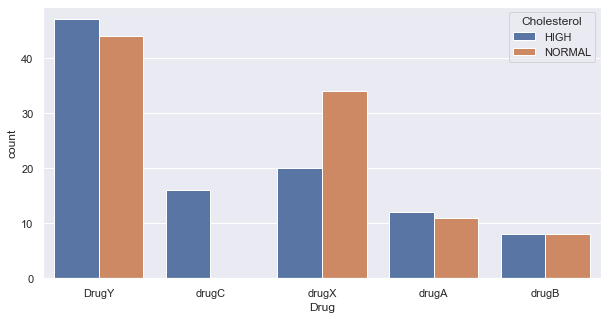

In [51]:
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'Drug',data = df,hue = 'Cholesterol' )
plt.show()

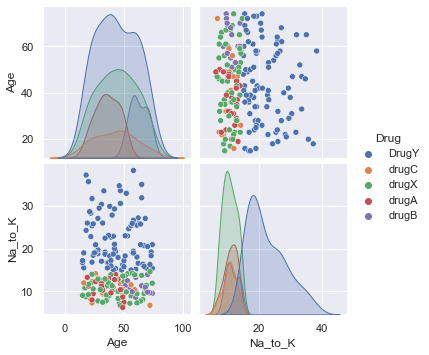

In [59]:
sns.pairplot(df,hue = 'Drug')
plt.show()

# DATA PREPARATION

In [ ]:
#DATA BINNING FOR NUMERICAL DATA

In [61]:
min_age = df['Age'].min()
max_age = df['Age'].max()

In [63]:
min_age 


15

In [64]:
max_age

74

In [66]:
binss = np.linspace(min_age,max_age,8)
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'],bins=binss,labels=category_age)

In [68]:
df['Age_binned'].value_counts()

30s     35
50s     32
40s     28
60s     27
<20s    26
>60s    26
20s     23
Name: Age_binned, dtype: int64

In [69]:
df.drop('Age',axis=1,inplace=True)

In [73]:
min_NatoK = df['Na_to_K'].min()
max_NatoK = df['Na_to_K'].max()

In [75]:
binsss = np.linspace(min_NatoK,max_NatoK,5)
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Natok_binned'] = pd.cut(df['Na_to_K'],bins=binsss,labels=category_NatoK)

In [76]:
df['Natok_binned'].value_counts()

<10      107
10-20     52
20-30     28
>30       12
Name: Natok_binned, dtype: int64

In [77]:
df.drop('Na_to_K',axis=1,inplace=True)

In [78]:
df.head()

,Sex,BP,Cholesterol,Drug,Age_binned,Natok_binned
0,F,HIGH,HIGH,DrugY,<20s,20-30
1,M,LOW,HIGH,drugC,40s,<10
2,M,LOW,HIGH,drugC,40s,<10
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,DrugY,60s,10-20


# SPLITTING THE DATASET

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [80]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# FEATURE ENGINEERING

In [81]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [82]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Natok_binned_<10,Natok_binned_10-20,Natok_binned_20-30,Natok_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [83]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Natok_binned_<10,Natok_binned_10-20,Natok_binned_20-30,Natok_binned_>30
18,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
98,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0


# SMOTE Technique 
Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting.

In [84]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

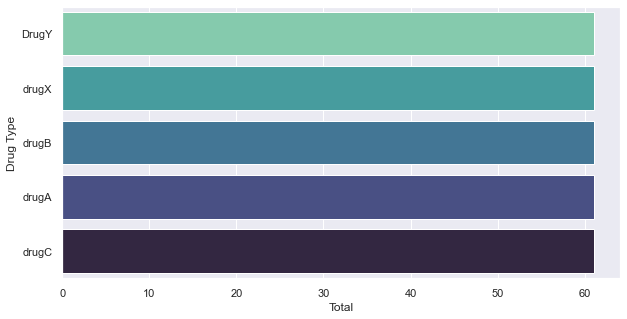

In [86]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

# MODELING

-->Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_test,pred)
print("Logistic Regression accuracy is : {:.2f}%".format(accuracy_score(y_test,pred)*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.97      0.98        30
       drugA       0.71      1.00      0.83         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.97        60
   macro avg       0.94      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60

[[29  1  0  0  0]
 [ 0  5  0  0  0]
 [ 0  1  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Logistic Regression accuracy is : 96.67%


C:\Users\Shikha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-->K Neighbours

In [104]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier(n_neighbors=20)
k.fit(X_train,y_train)
pred1 = k.predict(X_test)
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))
KNAcc = accuracy_score(y_test,pred1)
print("K Neighbors accuracy is : {:.2f}%".format(accuracy_score(y_test,pred1)*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.97      0.98        30
       drugA       0.62      1.00      0.77         5
       drugB       1.00      0.33      0.50         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.95        60
   macro avg       0.93      0.86      0.85        60
weighted avg       0.97      0.95      0.95        60

[[29  1  0  0  0]
 [ 0  5  0  0  0]
 [ 0  2  1  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
K Neighbors accuracy is : 95.00%


-->Support Vector Machine (SVM)

In [105]:
from sklearn.svm import SVC
s1 = SVC(kernel='linear')
s1.fit(X_train,y_train)
pred2 = s1.predict(X_test)
print(classification_report(y_test,pred2))
SVCAcc = accuracy_score(y_test,pred2)
print("SVC accuracy is : {:.2f}%".format(accuracy_score(y_test,pred2)*100))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      0.80      0.89         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.99      0.98      0.98        60

SVC accuracy is : 98.33%


-->Naive Bayes

In [98]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      0.80      0.89         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.99      0.98      0.98        60

[[30  0  0  0  0]
 [ 0  4  1  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Naive Bayes accuracy is: 98.33%


In [99]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      0.80      0.89         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.99      0.98      0.98        60

[[30  0  0  0  0]
 [ 0  4  1  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Gaussian Naive Bayes accuracy is: 98.33%


-->Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
d.fit(X_train,y_train)
pred3 = d.predict(X_test)
print(classification_report(y_test,pred3))
print(confusion_matrix(y_test,pred3))
DTAcc = accuracy_score(y_test,pred3)
print("Decision tress accuracy is : {:.2f}%".format(accuracy_score(y_test,pred3)*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.97      0.98        30
       drugA       0.80      0.80      0.80         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.97        60
   macro avg       0.91      0.95      0.93        60
weighted avg       0.97      0.97      0.97        60

[[29  1  0  0  0]
 [ 0  4  1  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Decision tress accuracy is : 96.67%


-->Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      0.80      0.89         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.99      0.98      0.98        60

[[30  0  0  0  0]
 [ 0  4  1  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 98.33%


In [107]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, NBAcc1*100, NBAcc2*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,SVM,98.333333
3,Categorical NB,98.333333
4,Gaussian NB,98.333333
6,Random Forest,98.333333
0,Logistic Regression,96.666667
5,Decision Tree,96.666667
1,K Neighbors,95.000000
